# 単語の抽象性、具体性を組み込む

In [55]:
import pandas as pd

# テキストファイルのパスを指定
txt_file_path = "bin/AWD-J_EX.txt"

# テキストファイルをDataFrameとして読み込む
df = pd.read_csv(txt_file_path, delimiter='\t', header=0)

# DataFrameの内容を表示
df = df[df["PoS"] == "名詞"]
df = df.reset_index(drop=True)
df


,Word,Score,Deviation,PoS
0,せんしゅけん,1.03,118.31,名詞
1,アフリカン・アメリカン,1.04,117.41,名詞
2,継ぎ,1.09,114.84,名詞
3,乗降人員,1.10,113.96,名詞
4,マレーシア,1.12,112.98,名詞
...,...,...,...,...
414212,至,3.76,-40.57,名詞
414213,賢,3.76,-40.63,名詞
414214,関,3.78,-42.01,名詞
414215,求,3.79,-42.22,名詞


In [56]:
df_r = pd.read_pickle("bin/frec_jawiki-latest-pages-articles.pkl")
# 単語の出現頻度数の閾値を指定
FREQUENCY_THRESHOLD = 20000
df_higher_rank = df_r[df_r["Frequency"] >= FREQUENCY_THRESHOLD]

In [57]:
df_higher_rank

,Word,Frequency
0,年,3057925
1,日,1879591
2,月,1278188
3,者,1019071
4,人,982168
...,...,...
2174,アシスタント,20084
2175,ドライバー,20071
2176,売却,20061
2177,知識,20025


In [58]:
# ２つを結合させたDataFrameを作成
merged_df = df.merge(df_r, on="Word", how="inner")

In [59]:
# merged_df.to_pickle("bin/frequency_and_abstractness_data.pkl")

# サンプルの言葉の抽象度を分布にする。

1.8878625954198474

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font famil

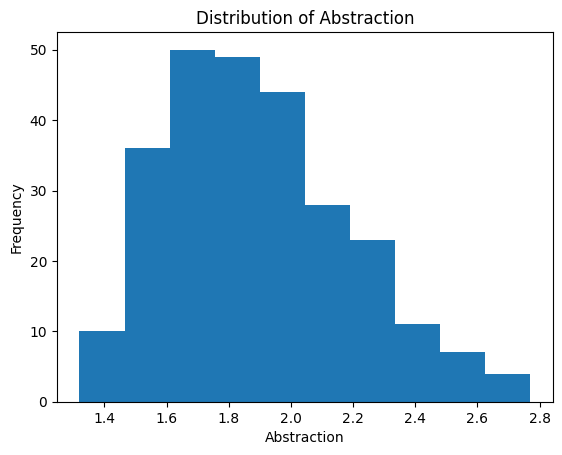

In [60]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open('word_pairs.json', 'r', encoding='utf-8') as f:
    word_pairs = json.load(f)

score_lst = []
for word1, word2 in word_pairs:
    if word1 in merged_df["Word"].values:
        d1 = merged_df[merged_df["Word"] == word1]
        score_lst.append(d1["Score"].iloc[0])
    if word2 in merged_df["Word"].values:
        d2 = merged_df[merged_df["Word"] == word2]
        score_lst.append(d2["Score"].iloc[0])

plt.hist(score_lst, bins=10)
plt.title("Distribution of Abstraction")
plt.xlabel("Abstraction")
plt.ylabel("Frequency")
np.mean(score_lst)

# 新しいモデルの作成
## モデル作成の流れ
閾値を設定する  
・抽象度  
・頻度  
2つのパラメータを決めたら、modelと結合して新しいモデルを作る。


In [262]:
# 閾値の設定
FREQUENCY_THRESHOLD = 20000
ABSTRACTNESS_THRESHOLD = 2.4

In [263]:
merged_df

,Word,Score,Deviation,PoS,Frequency
0,継ぎ,1.09,114.84,名詞,397
1,池袋,1.16,110.48,名詞,19138
2,食肉,1.17,110.02,名詞,1931
3,乳製品,1.17,109.94,名詞,1067
4,和歌山,1.17,109.91,名詞,38312
...,...,...,...,...,...
182933,至,3.76,-40.57,名詞,10275
182934,賢,3.76,-40.63,名詞,12711
182935,関,3.78,-42.01,名詞,25772
182936,求,3.79,-42.22,名詞,3357


In [264]:
limited_merged_df = merged_df[(merged_df["Score"] <= ABSTRACTNESS_THRESHOLD) & (merged_df["Frequency"] >= FREQUENCY_THRESHOLD)]

In [265]:
limited_merged_df.head(30)

,Word,Score,Deviation,PoS,Frequency
4,和歌山,1.17,109.91,名詞,38312
5,鹿児島,1.18,109.51,名詞,68286
9,函館,1.21,107.49,名詞,27770
12,横浜,1.22,106.84,名詞,126015
15,岡山,1.24,105.90,名詞,86984
18,トン,1.25,105.43,名詞,44051
19,池,1.25,105.21,名詞,25845
25,教室,1.28,103.53,名詞,39163
34,愛媛,1.30,102.17,名詞,37836
38,青森,1.31,101.95,名詞,53481


In [266]:
# 新しいモデルの作成
import gensim
import pandas as pd
from gensim.models import KeyedVectors

# モデルを読み込む
model = gensim.models.KeyedVectors.load_word2vec_format("bin/model_nouns_only.bin", binary=True)

# 単語リスト
words_list = limited_merged_df["Word"].to_list()

# 新しいモデルのベクトルを保存するための辞書
new_vectors = {}

# 元のモデルから指定された単語のベクトルを抽出
for word in words_list:
    if word in model.key_to_index:
        new_vectors[word] = model[word]

# 新しいモデルを作成
new_model = KeyedVectors(vector_size=model.vector_size)
new_model.add_vectors(list(new_vectors.keys()), list(new_vectors.values()))

# 新しいモデルを保存
new_model.save_word2vec_format("bin/wordwolf_model.bin", binary=True)


# テスト

In [267]:
import random
test_model = gensim.models.KeyedVectors.load_word2vec_format('bin/wordwolf_model.bin', binary=True)
random_word = random.choice(list(test_model.key_to_index.keys()))
print(random_word)
similar_words_lst = test_model.similar_by_key(random_word, topn=1000)
print(similar_words_lst)

min_difference = float('inf')
nearest_word = None
for word, similarity in similar_words_lst:
    difference = abs(similarity - 0.4)
    if difference < min_difference:
        min_difference = difference
        nearest_word = word

print(nearest_word)


製品
[('商品', 0.691217303276062), ('メーカー', 0.6499144434928894), ('製造', 0.628433883190155), ('販売', 0.6043269634246826), ('ブランド', 0.598893404006958), ('品', 0.5513308048248291), ('機種', 0.5481829643249512), ('機器', 0.5384872555732727), ('生産', 0.5154576301574707), ('価格', 0.48540937900543213), ('食品', 0.47320979833602905), ('企業', 0.4711102247238159), ('規格', 0.465440958738327), ('市場', 0.46142807602882385), ('同社', 0.4458405673503876), ('工場', 0.44577130675315857), ('性能', 0.4391612112522125), ('産業', 0.4354446828365326), ('発売', 0.4336549639701843), ('ソフト', 0.4327550232410431), ('消費', 0.4147084653377533), ('仕様', 0.4108479619026184), ('開発', 0.4007355868816376), ('サービス', 0.3920036852359772), ('携帯', 0.3910233676433563), ('社名', 0.39008742570877075), ('子会社', 0.3885836601257324), ('搭載', 0.3871174156665802), ('会社', 0.3846967816352844), ('工業', 0.383165568113327), ('小型', 0.38069263100624084), ('機械', 0.376584529876709), ('バージョン', 0.3762061893939972), ('国内', 0.3759613037109375), ('使用', 0.37169477343559265), ('品番'